## Compare the z-scores of genomic windows computed using `constraint-tools` with those of Chen et al 2022 

Chen et al paper is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022


In [1]:
import pandas as pd

CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
chen_mchale_zscores_filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.multiple-kmers.bed'
chen_mchale_zscores = pd.read_csv(chen_mchale_zscores_filename, sep='\t')
chen_mchale_zscores

,chromosome,start,end,N_observed,K_observed,M,N_bar_3,K_bar_3,N_bar_5,K_bar_5,N_bar_7,K_bar_7,chen_zscore
0,chr1,1432000,1433000,260,110,257,-0.254203,-2.016241612762811,-0.316478,-2.016241612762811,-0.325217,-2.016241612762811,2.384293
1,chr1,1435000,1436000,275,149,272,-7.711445,1.0837126170320344,-7.032362,1.0837126170320344,-6.425345,1.0837126170320344,-2.952197
2,chr1,1449000,1450000,225,113,223,0.327887,-0.43437415492135656,0.404163,-0.43437415492135656,0.259578,-0.43437415492135656,-0.899126
3,chr1,1450000,1451000,313,109,308,2.185323,-3.3146359070350946,2.512368,-3.3146359070350946,2.587098,-3.3146359070350946,-5.461776
4,chr1,1451000,1452000,293,129,293,2.376220,-1.460945287275204,2.767957,-1.460945287275204,3.021663,-1.460945287275204,-1.497436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr22,50224000,50225000,254,137,254,0.470386,0.7011477917731173,0.530959,0.7011477917731173,0.584696,0.7011477917731173,-5.828498
1796996,chr22,50227000,50228000,283,122,283,1.212395,-1.602653587803972,1.351284,-1.6014191831134763,1.384147,-1.6014191831134763,-2.528842
1796997,chr22,50228000,50229000,241,121,229,-0.310536,0.15471283440311814,-0.316938,0.15471283440311814,-0.267572,0.15471283440311814,1.302929
1796998,chr22,50229000,50230000,231,121,231,-1.304697,0.06987977615349292,-1.230692,0.06987977615349292,-1.203488,0.06987977615349292,-3.331737


In [4]:
for kmer_size in [3, 5, 7]:
    chen_mchale_zscores[f'K_bar_{kmer_size}'] = pd.to_numeric(
        chen_mchale_zscores[f'K_bar_{kmer_size}'], 
        errors='coerce'
    )

In [5]:
chen_mchale_zscores = chen_mchale_zscores.dropna()

In [6]:
chen_mchale_zscores.describe()

,start,end,N_observed,K_observed,M,N_bar_3,K_bar_3,N_bar_5,K_bar_5,N_bar_7,K_bar_7,chen_zscore
count,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06,1.795287e+06
mean,8.147613e+07,8.147713e+07,2.019785e+02,1.061848e+02,2.009535e+02,-2.094021e-01,-1.737482e-02,-2.131592e-01,-1.737475e-02,-2.148604e-01,-1.737466e-02,-5.932066e-01
std,5.514478e+07,5.514478e+07,3.179617e+01,1.671702e+01,3.150096e+01,2.313667e+00,9.926324e-01,2.309811e+00,9.926324e-01,2.294033e+00,9.926324e-01,2.115048e+00
min,5.220000e+05,5.230000e+05,1.260000e+02,5.000000e+01,1.260000e+02,-1.809598e+01,-5.250357e+00,-1.749582e+01,-5.250357e+00,-1.674785e+01,-5.250357e+00,-9.999583e+00
25%,3.656600e+07,3.656700e+07,1.820000e+02,9.500000e+01,1.810000e+02,-1.660772e+00,-6.766122e-01,-1.665861e+00,-6.766122e-01,-1.658938e+00,-6.766101e-01,-1.756111e+00
50%,7.262500e+07,7.262600e+07,1.970000e+02,1.040000e+02,1.960000e+02,-5.146177e-01,-7.596440e-03,-5.225843e-01,-7.596440e-03,-5.257053e-01,-7.596440e-03,-4.505847e-01
75%,1.161265e+08,1.161275e+08,2.160000e+02,1.150000e+02,2.150000e+02,8.325168e-01,6.580968e-01,8.232327e-01,6.580968e-01,8.092536e-01,6.580968e-01,7.595528e-01
max,2.484140e+08,2.484150e+08,5.610000e+02,2.390000e+02,4.300000e+02,2.489164e+01,4.549198e+00,2.453939e+01,4.549198e+00,2.373579e+01,4.549198e+00,9.924837e+00


In [7]:
# Chen et al's z-score is positive for negative selection, 
# whereas McHale et al's Nbar z-score is negative for negative selection
chen_mchale_zscores['chen_negative_zscore'] = -chen_mchale_zscores['chen_zscore']

<ipython-input-7-d15f4cea3542>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_mchale_zscores['chen_negative_zscore'] = -chen_mchale_zscores['chen_zscore']


Text(0.5, 0, 'z-score')

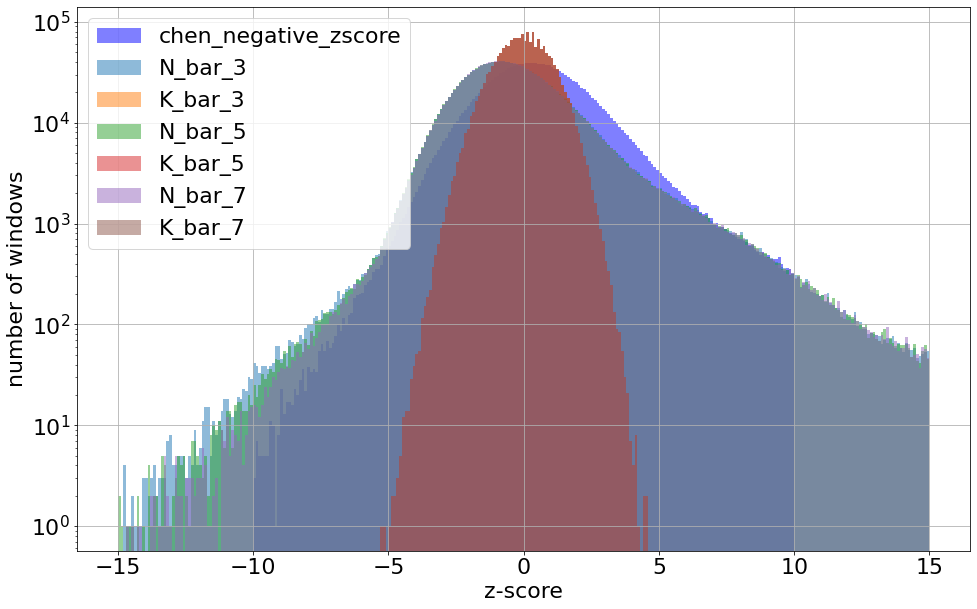

In [11]:
import numpy as np 

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

bin_width = 0.1
bin_edges = np.arange(-15, 15+bin_width, bin_width)
axis = chen_mchale_zscores['chen_negative_zscore'].hist(alpha=0.5, color='blue', legend=True, bins=bin_edges)
for kmer_size in [3, 5, 7]:
    axis = chen_mchale_zscores[f'N_bar_{kmer_size}'].hist(
        ax=axis, alpha=0.5, color=None, legend=True, bins=bin_edges)
    axis = chen_mchale_zscores[f'K_bar_{kmer_size}'].hist(
        ax=axis, alpha=0.5, color=None, legend=True, bins=bin_edges)
axis.set_yscale('log')
axis.figure.set_size_inches(16,10)
axis.set_ylabel('number of windows')
axis.set_xlabel('z-score')

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


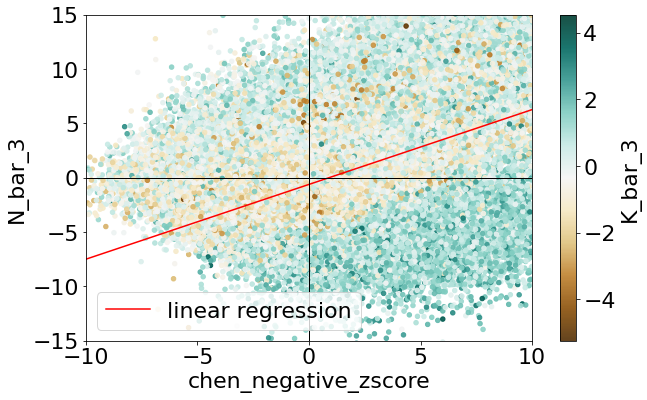

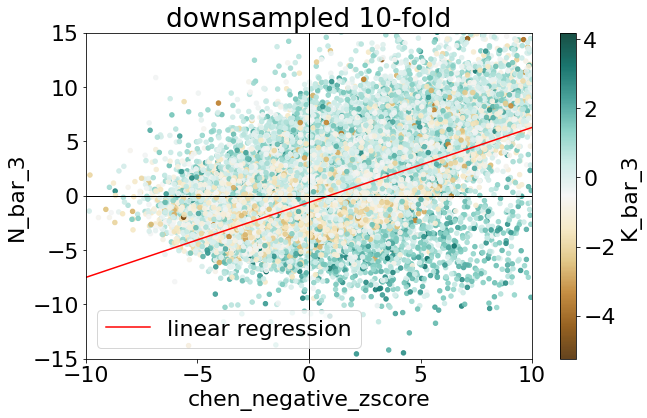

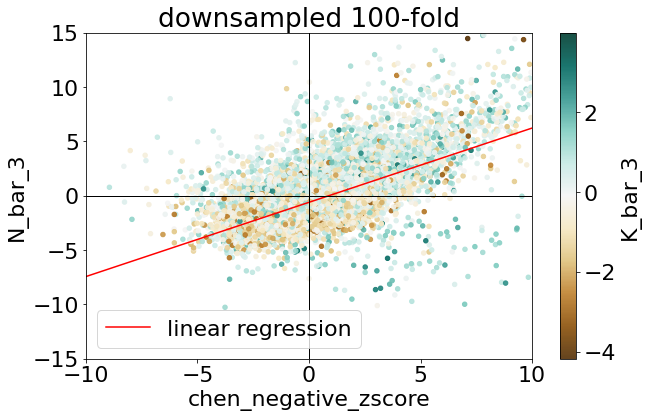

In [13]:
from sklearn.linear_model import LinearRegression

def correlate_zscores(x_label, y_label, z_label, step_size=1): 
    df = chen_mchale_zscores.iloc[::step_size, :]
        
    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,6))
    axis = df.plot.scatter(
        x=x_label,
        y=y_label,
        c=z_label,
        colormap = 'BrBG',
        alpha = 0.9,
        ax=axis        
    )

    linear_regression = LinearRegression()
    linear_regression.fit(
        np.array(df[x_label]).reshape(-1,1), 
        np.array(df[y_label])
    )
    x = [-10, 10]
    linear_regression_fit = linear_regression.predict(np.array(x).reshape(-1,1))
    plt.plot(x, linear_regression_fit, 'red', label='linear regression')

    axis.set_xlim(-10, 10)
    axis.set_ylim(-15, 15)
    axis.figure.set_size_inches(10,6)
    plt.legend()
    
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')

    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')

for step_size in [1, 10, 100]:
    correlate_zscores(    
        x_label='chen_negative_zscore',
        y_label='N_bar_3',
        z_label='K_bar_3',
        step_size=step_size
    )

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


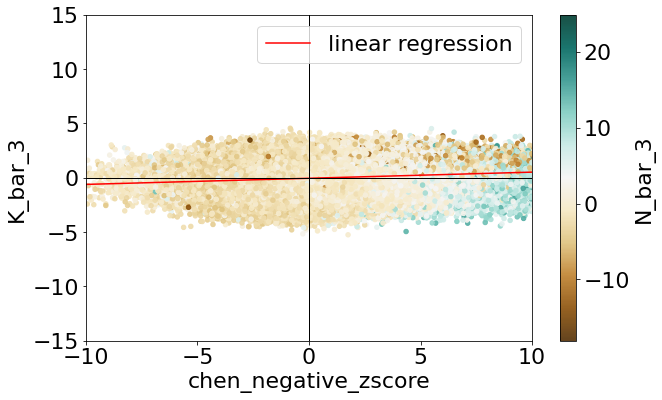

In [14]:
correlate_zscores(    
    x_label='chen_negative_zscore',
    y_label='K_bar_3',
    z_label='N_bar_3'
)